Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers

Loading the dataset

In [2]:
heart_data=pd.read_csv("heart.csv")

In [3]:
heart_data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

Advanced Preprocessing(Correlation)

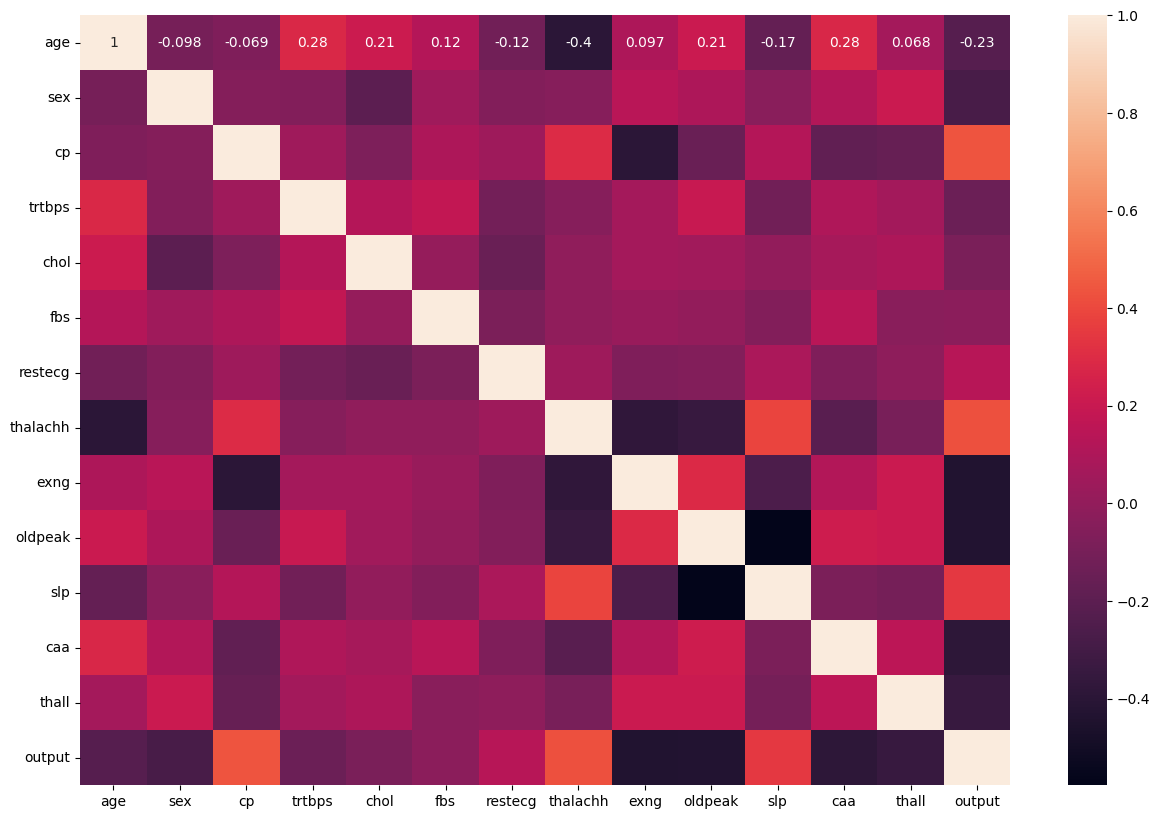

In [6]:
plt.figure(figsize=(15,10))
sns.heatmap(heart_data.corr(),annot=True)
plt.show()

In [7]:
heart_data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [8]:
y=heart_data['output']
X=heart_data.drop(['output'],axis=1)

In [9]:
# create X and Y datasets for training
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, random_state=42, test_size = 0.2)

Scaling the data

In [10]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Building an ANN Model

In [11]:
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from sklearn.model_selection import GridSearchCV
# from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

from keras.callbacks import EarlyStopping
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
early_stopping = EarlyStopping(monitor="loss")# early stop patience
 #verbose set to 1 will show the training process
 

In [12]:
history = ann.fit(X_train, y_train,
          batch_size=32,
          epochs=55,
          verbose=0)

In [13]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)


2/2 [==============================] - 0s 0s/step


In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))

[[18 10]
 [ 2 31]]
Accuracy: 80.33%


Genetic Algorithm

In [15]:
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

# Define the bounds of the search space for hyperparameters
LEARNING_RATE_BOUNDS = [0.0001, 0.1]
EPOCHS_BOUNDS = [10, 100]
BATCH_SIZE_BOUNDS = [32, 256]

# Define the size of the population and number of generations to evolve
POPULATION_SIZE = 20
NUM_GENERATIONS = 50

# Define the fitness function to evaluate the quality of each set of hyperparameters
def evaluate_fitness(hyperparameters):
   ann = tf.keras.models.Sequential()
   ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
   ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
   ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
   ann.compile(optimizer = Adam(learning_rate=hyperparameters["learning_rate"]), loss = 'binary_crossentropy', metrics = ['accuracy'])
   print("--------------------------------------------------------------------------")
   ann.fit(X_train, y_train, batch_size=hyperparameters["batch_size"], epochs=hyperparameters["epochs"])
   print("--------------------------------------------------------------------------")
   _,accuracy = ann.evaluate(X_test, y_test)
   return accuracy

# Define the genetic algorithm
def genetic_algorithm():
    # Initialize a population of random sets of hyperparameters
    population = []
    for i in range(POPULATION_SIZE):
        learning_rate = random.uniform(*LEARNING_RATE_BOUNDS)
        epochs = random.randint(*EPOCHS_BOUNDS)
        batch_size = random.randint(*BATCH_SIZE_BOUNDS)
        hyperparameters = {"learning_rate": learning_rate, "epochs": epochs, "batch_size": batch_size}
        population.append(hyperparameters)

    # Evolve the population over multiple generations
    for generation in range(NUM_GENERATIONS):
        # Evaluate the fitness of each set of hyperparameters
        fitness_scores = []
        for hyperparameters in population:
            fitness_scores.append(evaluate_fitness(hyperparameters))

        # Select the fittest individuals to be parents of the next generation
        parent_indices = np.argsort(fitness_scores)[-int(POPULATION_SIZE / 2):]

        # Generate offspring by randomly combining parents' hyperparameters
        offspring = []
        for i in range(int(POPULATION_SIZE / 2)):
            parent1_index = random.choice(parent_indices)
            parent2_index = random.choice(parent_indices)
            offspring_hyperparameters = {}
            for key in hyperparameters.keys():
                if random.random() < 0.5:
                    offspring_hyperparameters[key] = population[parent1_index][key]
                else:
                    offspring_hyperparameters[key] = population[parent2_index][key]
            offspring.append(offspring_hyperparameters)

        # Mutate the offspring by randomly changing hyperparameters
        for i in range(int(POPULATION_SIZE / 2)):
            for key in offspring[i].keys():
                if random.random() < 0.1:
                    if key == "learning_rate":
                        offspring[i][key] = random.uniform(*LEARNING_RATE_BOUNDS)
                    elif key == "epochs":
                        offspring[i][key] = random.randint(*EPOCHS_BOUNDS)
                    elif key == "batch_size":
                        offspring[i][key] = random.randint(*BATCH_SIZE_BOUNDS)

        # Replace the old population with the new offspring
        population = offspring

    # Select the best set of hyperparameters from the final population
    best_hyperparameters = max(population, key=lambda x: evaluate_fitness(x))

    return best_hyperparameters


In [16]:
# print(genetic_algorithm())

In [17]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = Adam(learning_rate= 0.05190371108611933), loss = 'binary_crossentropy', metrics = ['accuracy'])
print("--------------------------------------------------------------------------")
ann.fit(X_train, y_train, batch_size=65, epochs=24)
print("--------------------------------------------------------------------------")

--------------------------------------------------------------------------
Epoch 1/24
4/4 [==============================] - 1s 4ms/step - loss: 0.6397 - accuracy: 0.6240
Epoch 2/24
4/4 [==============================] - 0s 2ms/step - loss: 0.4613 - accuracy: 0.8306
Epoch 3/24
4/4 [==============================] - 0s 6ms/step - loss: 0.4060 - accuracy: 0.8306
Epoch 4/24
4/4 [==============================] - 0s 4ms/step - loss: 0.3669 - accuracy: 0.8430
Epoch 5/24
4/4 [==============================] - 0s 5ms/step - loss: 0.3249 - accuracy: 0.8678
Epoch 6/24
4/4 [==============================] - 0s 2ms/step - loss: 0.3143 - accuracy: 0.8636
Epoch 7/24
4/4 [==============================] - 0s 3ms/step - loss: 0.2868 - accuracy: 0.8719
Epoch 8/24
4/4 [==============================] - 0s 5ms/step - loss: 0.2705 - accuracy: 0.8802
Epoch 9/24
4/4 [==============================] - 0s 3ms/step - loss: 0.2524 - accuracy: 0.8843
Epoch 10/24
4/4 [==============================] - 0s 3ms/ste

In [18]:
_,accuracy = ann.evaluate(X_test, y_test)

2/2 [==============================] - 0s 12ms/step - loss: 1.0494 - accuracy: 0.7213


Bayesian Optimization

In [19]:
!pip install bayesian-optimization


In [20]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from bayes_opt import BayesianOptimization


In [21]:
from bayes_opt import BayesianOptimization
from keras.callbacks import EarlyStopping
# Define the function to be optimized
def optimize(learning_rate,neurons, batch_size, epochs,  patience):
    # Convert integer parameters to their appropriate types
    neurons = int(neurons)
    batch_size = int(batch_size)
    epochs = int(epochs)
    patience = int(patience)
    
    # Create the ANN model
    ann = tf.keras.models.Sequential()
    ann.add(tf.keras.layers.Dense(units=neurons, activation="relu"))
    ann.add(tf.keras.layers.Dense(units=neurons, activation="relu"))
    ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
    ann.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    
    # Define early stopping
    early_stopping = EarlyStopping(monitor="loss", patience=patience)
    
    # Train the model
    history = ann.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, callbacks=[early_stopping], verbose=0)
    
    # Get the validation accuracy
    val_loss, val_acc = ann.evaluate(X_test, y_test)
    
    return val_acc

# Define the parameter ranges for optimization
pbounds = {
    'learning_rate': (0.01, 0.1),
    'neurons': (8, 64),
    'batch_size': (8, 64),
    'epochs': (50, 100),
    'patience': (1, 5),

}



In [22]:
# Create an instance of BayesianOptimization
optimizer = BayesianOptimization(f=optimize, pbounds=pbounds, random_state=42)

# Perform the optimization
optimizer.maximize(init_points=5, n_iter=10)

# Get the best hyperparameters
best_params = optimizer.max['params']


|   iter    |  target   | batch_... |  epochs   | learni... |  neurons  | patience  |
-------------------------------------------------------------------------------------
2/2 [==============================] - 0s 14ms/step - loss: 0.5810 - accuracy: 0.7869
| 1         | 0.7869    | 28.97     | 97.54     | 0.07588   | 41.52     | 1.624     |
2/2 [==============================] - 0s 14ms/step - loss: 0.8104 - accuracy: 0.7377
| 2         | 0.7377    | 16.74     | 52.9      | 0.08796   | 41.66     | 3.832     |
2/2 [==============================] - 0s 17ms/step - loss: 0.5584 - accuracy: 0.7049
| 3         | 0.7049    | 9.153     | 98.5      | 0.08492   | 19.89     | 1.727     |
2/2 [==============================] - 0s 20ms/step - loss: 0.5567 - accuracy: 0.8033
| 4         | 0.8033    | 18.27     | 65.21     | 0.05723   | 32.19     | 2.165     |
2/2 [==============================] - 0s 12ms/step - loss: 1.3893 - accuracy: 0.7705
| 5         | 0.7705    | 42.26     | 56.97     | 0.03

Grid SearchCV

In [23]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Define the ANN model
def create_ann(neurons=32, activation='relu', learning_rate=0.01, epochs=75):
    ann = tf.keras.models.Sequential()
    ann.add(tf.keras.layers.Dense(units=8, activation=activation))
    ann.add(tf.keras.layers.Dense(units=8, activation=activation))
    ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
    
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    ann.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    return ann

# Create an instance of the KerasClassifier
ann_model = KerasClassifier(build_fn=create_ann, verbose=0)

# Define the parameter grid
param_grid = {
    'neurons': [16, 32, 64],
    'activation': ['relu', 'sigmoid'],
    'learning_rate': [0.001, 0.01, 0.1],
    'epochs': [50, 75, 100]
}

# Perform Grid Search CV
grid_search = GridSearchCV(estimator=ann_model, param_grid=param_grid, cv=3)
grid_search_result = grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search_result.best_params_
best_score = grid_search_result.best_score_

# Train the final model using the best parameters
final_model = create_ann(
    neurons=best_params['neurons'],
    activation=best_params['activation'],
    learning_rate=best_params['learning_rate'],
    epochs=best_params['epochs']
)
final_model.fit(X_train, y_train, epochs=best_params['epochs'], verbose=0)


C:\Users\DELL\AppData\Local\Temp\ipykernel_16752\2281590038.py:17: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ann_model = KerasClassifier(build_fn=create_ann, verbose=0)


In [24]:
print(f"Best Parameters: {best_params}")
val_loss, val_acc=final_model.evaluate(X_test,y_test)
print(f"Accuracy: {val_acc}" )

Best Parameters: {'activation': 'sigmoid', 'epochs': 100, 'learning_rate': 0.01, 'neurons': 64}
2/2 [==============================] - 0s 0s/step - loss: 0.4694 - accuracy: 0.7541
Accuracy: 0.7540983557701111


Randomized SearchCV

In [25]:
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from scipy.stats import randint as sp_randint

# Define the ANN model
def create_ann(neurons=32, activation='relu'):
    ann = tf.keras.models.Sequential()
    ann.add(tf.keras.layers.Dense(units=8, activation=activation))
    ann.add(tf.keras.layers.Dense(units=8, activation=activation))
    ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
    ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return ann

# Create an instance of the KerasClassifier
ann_model = KerasClassifier(build_fn=create_ann, epochs=75, batch_size=32, verbose=0)

# Define the parameter distributions
param_dist = {
    'neurons': sp_randint(16, 64),
    'activation': ['relu', 'sigmoid']
}

# Perform Randomized Search CV
random_search = RandomizedSearchCV(estimator=ann_model, param_distributions=param_dist, n_iter=10, cv=3)
random_search_result = random_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = random_search_result.best_params_
best_score = random_search_result.best_score_

# Train the final model using the best parameters
final_model = create_ann(neurons=best_params['neurons'], activation=best_params['activation'])
final_model.fit(X_train, y_train, epochs=75, batch_size=32, verbose=0)


C:\Users\DELL\AppData\Local\Temp\ipykernel_16752\155339738.py:15: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ann_model = KerasClassifier(build_fn=create_ann, epochs=75, batch_size=32, verbose=0)


In [26]:
print(f"Best Parameters: {best_params}")
val_loss, val_acc=final_model.evaluate(X_test,y_test)
print(f"Accuracy: {val_acc}" )

Best Parameters: {'activation': 'relu', 'neurons': 27}
2/2 [==============================] - 0s 12ms/step - loss: 0.4692 - accuracy: 0.7705
Accuracy: 0.7704917788505554


Inbuilt Genetic Algorithm

In [27]:
!pip install tpot

In [28]:
!pip install --upgrade tpot
!pip install --upgrade deap


In [29]:
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from deap import creator, base, tools, algorithms

# Load your data
# X and y are your input features and labels respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define the ANN architecture
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define the evaluation function for DEAP
def evaluate_individual(individual):
    # Set the hyperparameters
    learning_rate = individual[0]
    batch_size = individual[1]

    # Compile the ANN with the given hyperparameters
    ann.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                loss='binary_crossentropy', metrics=['accuracy'])

    # Train the ANN
    ann.fit(X_train, y_train, batch_size=batch_size, epochs=10, verbose=0)

    # Evaluate the ANN on the test set
    accuracy = ann.evaluate(X_test, y_test, verbose=0)[1]

    return accuracy,

# Define the DEAP toolbox
toolbox = base.Toolbox()

# Define the range and type of each hyperparameter
hyperparameter_range = {
    'learning_rate':['constant', 'adaptive', 'invscaling'],
    'batch_size': [16, 32, 64]
}
hyperparameter_types = [float, int]

# Define the number of individuals in the population
population_size = 50

# Register the hyperparameters in the toolbox
for hyperparameter_name, hyperparameter_type in zip(hyperparameter_range.keys(), hyperparameter_types):
    toolbox.register(hyperparameter_name, np.random.choice, hyperparameter_range[hyperparameter_name])
    toolbox.register(hyperparameter_name + "_type", hyperparameter_type)

# Define the individual and population creation functions
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)
toolbox.register("individual", tools.initCycle, creator.Individual,
                 (getattr(toolbox, hyperparameter_name) for hyperparameter_name in hyperparameter_range.keys()))
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Define the genetic operators
toolbox.register("evaluate", evaluate_individual)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutUniformInt, low=0, up=len(hyperparameter_range) - 1, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)

# Run the genetic algorithm using TPOT


In [30]:
tpot = TPOTClassifier(generations=10, population_size=population_size, verbosity=2,
                      early_stop=5, config_dict={'sklearn.neural_network.MLPClassifier': hyperparameter_range})

# Fit TPOT to your data
tpot.fit(X_train, y_train)

# Evaluate the best pipeline found by TPOT on the test set
best_pipeline = tpot.fitted_pipeline_
accuracy = best_pipeline.score(X_test, y_test)




Optimization Progress:   0%|          | 0/550 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8099489795918368

Generation 2 - Current best internal CV score: 0.8099489795918368

Generation 3 - Current best internal CV score: 0.8099489795918368

Generation 4 - Current best internal CV score: 0.8099489795918368

Generation 5 - Current best internal CV score: 0.8099489795918368

Generation 6 - Current best internal CV score: 0.8099489795918368

The optimized pipeline was not improved after evaluating 5 more generations. Will end the optimization process.

TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: MLPClassifier(MLPClassifier(input_matrix, batch_size=32, learning_rate=adaptive), batch_size=16, learning_rate=constant)


C:\Users\DELL\anaconda3\envs\sk\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\envs\sk\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


In [31]:
print("Accuracy:", accuracy)

Accuracy: 0.7704918032786885


In [32]:
print(f"Best Hyperparameters: {best_pipeline }")

Best Hyperparameters: Pipeline(steps=[('stackingestimator',
                 StackingEstimator(estimator=MLPClassifier(batch_size=32,
                                                           learning_rate='adaptive'))),
                ('mlpclassifier', MLPClassifier(batch_size=16))])
